In [1]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
df=pd.read_csv('felez/data.csv', index_col=0,parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2022-02-12 to 2022-05-08
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cfolad  50 non-null     float64
 1   calo    50 non-null     float64
 2   czob    50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


In [4]:
df.head()

,cfolad,calo,czob
date,,,
2022-02-12,10260.0,11230.0,2451.0
2022-02-13,10220.0,10680.0,2366.0
2022-02-14,10480.0,10590.0,2362.0
2022-02-16,10490.0,10480.0,2396.0
2022-02-19,10490.0,10370.0,2372.0


In [5]:
df.tail()

,cfolad,calo,czob
date,,,
2022-04-30,11960.0,15610.0,2863.0
2022-05-01,11880.0,15950.0,2875.0
2022-05-02,11770.0,16120.0,2885.0
2022-05-07,11820.0,NaN,NaN
2022-05-08,12050.0,NaN,NaN


In [6]:
df.dropna(inplace=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

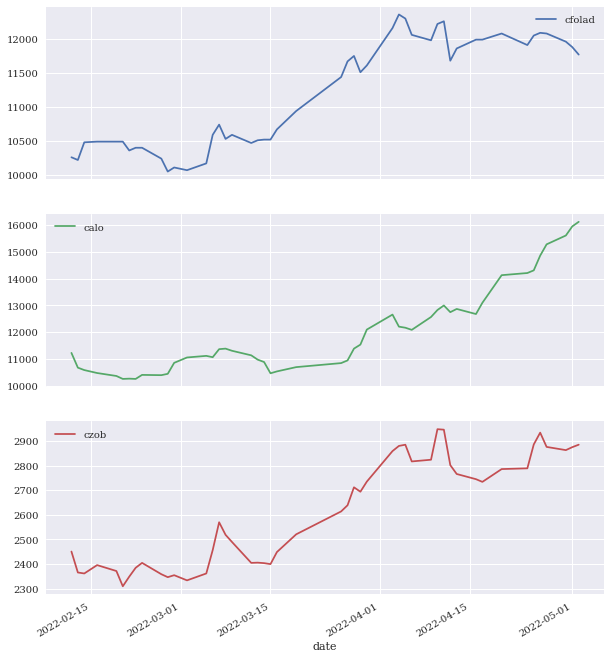

In [7]:
df.plot(figsize=(10,12),subplots=True)

Summary Statistics

In [8]:
df.describe().round(2)

,cfolad,calo,czob
count,48.00,48.00,48.00
mean,11186.88,11969.38,2609.75
std,798.80,1649.45,219.57
min,10050.00,10260.00,2310.00
25%,10487.50,10695.00,2399.00
50%,11190.00,11340.00,2592.00
75%,11982.50,12770.00,2818.75
max,12360.00,16120.00,2948.00


In [9]:
df.mean()

cfolad    11186.875
calo      11969.375
czob       2609.750
dtype: float64

In [14]:
df.aggregate([min,np.mean,np.std,np.median,max]).round(2)

,cfolad,calo,czob
min,10050.00,10260.00,2310.00
mean,11186.88,11969.38,2609.75
std,798.80,1649.45,219.57
median,11190.00,11340.00,2592.00
max,12360.00,16120.00,2948.00


In [10]:
#absolute changes between two index values
df.diff().head()

,cfolad,calo,czob
date,,,
2022-02-12,NaN,NaN,NaN
2022-02-13,-40.0,-550.0,-85.0
2022-02-14,260.0,-90.0,-4.0
2022-02-16,10.0,-110.0,34.0
2022-02-19,0.0,-110.0,-24.0


In [16]:

df.diff().mean()

cfolad     32.127660
calo      104.042553
czob        9.234043
dtype: float64

In [20]:
#calculates the percentage change between two index values
df.pct_change().round(3).head()

,cfolad,calo,czob
date,,,
2022-02-12,NaN,NaN,NaN
2022-02-13,-0.004,-0.049,-0.035
2022-02-14,0.025,-0.008,-0.002
2022-02-16,0.001,-0.010,0.014
2022-02-19,0.000,-0.010,-0.010


<AxesSubplot:>

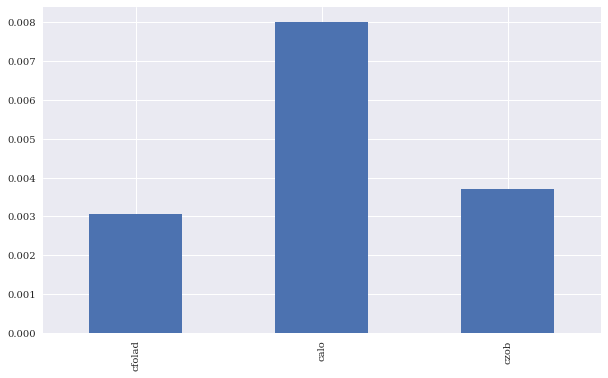

In [21]:
df.pct_change().mean().plot(kind='bar',figsize=(10,6))

In [25]:
#Calculates the log returns in vectorized fashion.
rets = np.log(df / df.shift(1))

In [26]:
rets.head().round(3)

,cfolad,calo,czob
date,,,
2022-02-12,NaN,NaN,NaN
2022-02-13,-0.004,-0.050,-0.035
2022-02-14,0.025,-0.008,-0.002
2022-02-16,0.001,-0.010,0.014
2022-02-19,0.000,-0.011,-0.010


<AxesSubplot:xlabel='date'>

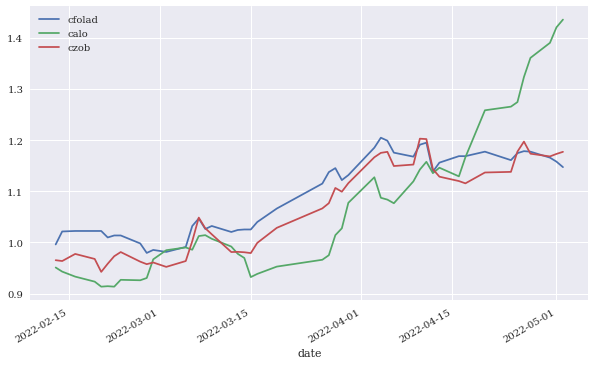

In [24]:
#Plots the cumulative log returns over time;
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

In [29]:
#Resampling
#data gets resampled to weekly time intervals
df.resample('1w', label='right').last().head()

,cfolad,calo,czob
date,,,
2022-02-13,10220.0,10680.0,2366.0
2022-02-20,10490.0,10260.0,2310.0
2022-02-27,10050.0,10450.0,2347.0
2022-03-06,10590.0,11070.0,2457.0
2022-03-13,10510.0,10980.0,2406.0


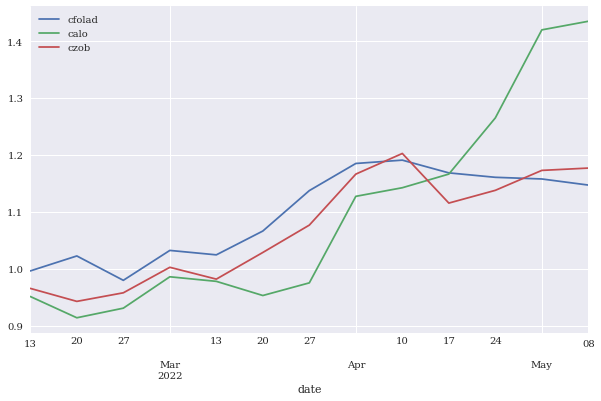

In [31]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6));

# Rolling Statistics

In [11]:
nem='cfolad'
df_f=pd.DataFrame(df[nem]).dropna()
df_f.head()

,cfolad
date,
2022-02-12,10260.0
2022-02-13,10220.0
2022-02-14,10480.0
2022-02-16,10490.0
2022-02-19,10490.0


In [14]:
window = 20
df_f['min'] = df_f[nem].rolling(window=window).min()
df_f['mean'] = df_f[nem].rolling(window=window).mean()
df_f['std'] = df_f[nem].rolling(window=window).std()
df_f['median'] = df_f[nem].rolling(window=window).median()
df_f['max'] = df_f[nem].rolling(window=window).max()
#Calculates the exponentially weighted moving average, with decay in terms of ahalf life of 0.5.
df_f['ewma'] = df_f[nem].ewm(halflife=0.5, min_periods=window).mean()

In [15]:
df_f.dropna().head()

,cfolad,min,mean,std,median,max,ewma
date,,,,,,,
2022-03-13,10510.0,10050.0,10383.0,191.148881,10435.0,10740.0,10507.128286
2022-03-14,10520.0,10050.0,10396.0,191.184672,10475.0,10740.0,10516.782072
2022-03-15,10520.0,10050.0,10411.0,188.397676,10485.0,10740.0,10519.195518
2022-03-16,10670.0,10050.0,10420.5,196.668971,10490.0,10740.0,10632.298879
2022-03-19,10940.0,10050.0,10443.0,228.245021,10490.0,10940.0,10863.074720


<AxesSubplot:xlabel='date'>

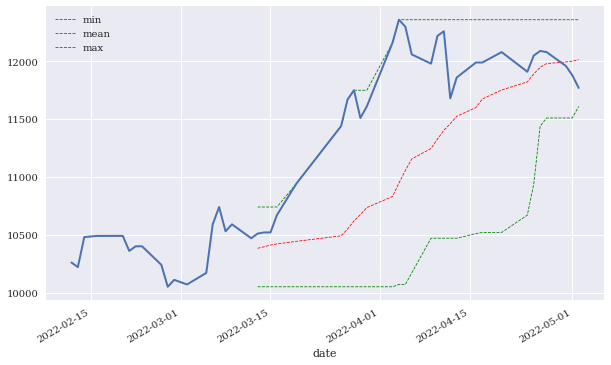

In [26]:
ax = df_f[['min', 'mean', 'max']].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
df_f[nem].plot(ax=ax, lw=2.0)

In [35]:
df_f['SMA1']=df_f[nem].rolling(window=5).mean()
df_f['SMA2']=df_f[nem].rolling(window=15).mean()

In [36]:
df_f[[nem,'SMA1','SMA2']].tail()

,cfolad,SMA1,SMA2
date,,,
2022-04-26,12090.0,12024.0,12066.000000
2022-04-27,12080.0,12042.0,12060.666667
2022-04-30,11960.0,12018.0,12034.000000
2022-05-01,11880.0,12012.0,12006.000000
2022-05-02,11770.0,11956.0,11986.666667


Visualizes the stock price data plus the two SMA time series

<AxesSubplot:xlabel='date'>

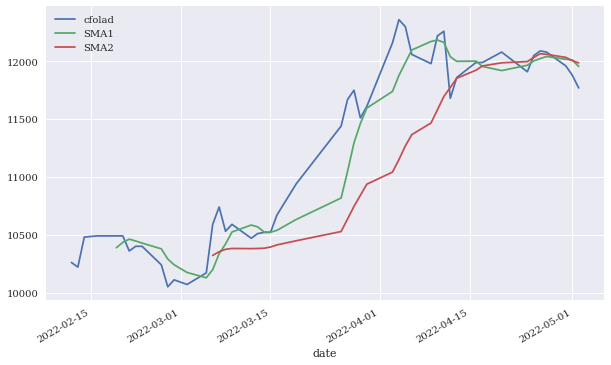

In [37]:
df_f[[nem,'SMA1','SMA2']].plot(figsize=(10,6))

In [38]:
df_f.dropna(inplace=True)

In [41]:
df_f['positions'] = np.where(df_f['SMA1'] > df_f['SMA2'],1,-1)

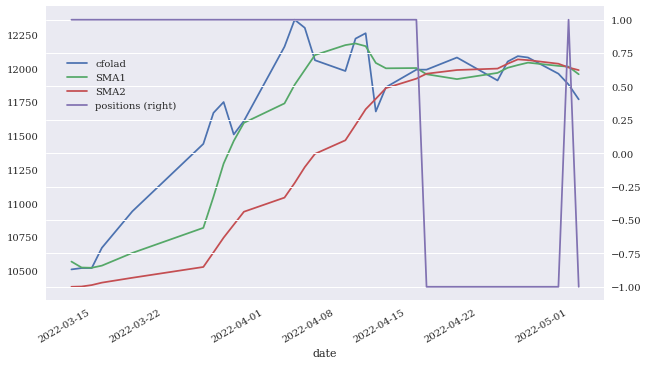

In [43]:
ax = df_f[[nem, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))